<a href="https://colab.research.google.com/github/poulami02/Diabetic-Retinopathy/blob/main/Diabetic_Retinopathy_%26_DME_for_MESSIDOR_2_fundus_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving messidor_data.csv to messidor_data.csv


{'messidor_data.csv': b'image_id,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable\n20051020_43808_0100_PP.png,0,0,1\n20051020_43832_0100_PP.png,1,0,1\n20051020_43882_0100_PP.png,1,0,1\n20051020_43906_0100_PP.png,2,1,1\n20051020_44261_0100_PP.png,0,0,1\n20051020_44284_0100_PP.png,0,0,1\n20051020_44338_0100_PP.png,0,0,1\n20051020_44349_0100_PP.png,2,0,1\n20051020_44400_0100_PP.png,0,0,1\n20051020_44431_0100_PP.png,0,0,1\n20051020_44598_0100_PP.png,2,0,1\n20051020_44636_0100_PP.png,2,0,1\n20051020_44692_0100_PP.png,0,0,1\n20051020_44714_0100_PP.png,0,0,1\n20051020_44762_0100_PP.png,1,0,1\n20051020_44782_0100_PP.png,1,0,1\n20051020_44901_0100_PP.png,2,1,1\n20051020_44923_0100_PP.png,2,0,1\n20051020_44982_0100_PP.png,0,0,1\n20051020_45004_0100_PP.png,1,0,1\n20051020_45050_0100_PP.png,3,1,1\n20051020_45068_0100_PP.png,3,1,1\n20051020_45110_0100_PP.png,4,1,1\n20051020_45137_0100_PP.png,4,1,1\n20051020_53062_0100_PP.png,3,1,1\n20051020_53178_0100_PP.png,3,1,1\n20051020_54209_0100_PP.p

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d google-brain/messidor2-dr-grades

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip messidor2-dr-grades.zip

Archive:  messidor2-dr-grades.zip
replace messidor_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: messidor_data.csv       
  inflating: messidor_readme.txt     


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os



In [ ]:
#Create pandas dataframe from csv file making first column as index
df = pd.read_csv('/content/messidor_data.csv',index_col=['image_id']);

#Lets summarize data
print('\n\n--- DESCRIBE ---\n')
df.describe()



--- DESCRIBE ---



,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable
count,1744.000000,1744.000000,1748.000000
mean,0.762041,0.086583,0.997712
std,1.038625,0.281303,0.047795
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000
75%,2.000000,0.000000,1.000000
max,4.000000,1.000000,1.000000


In [ ]:
#Lets peek into data
print('\n\n--- HEAD ---\n')
df.head()



--- HEAD ---



,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable
image_id,,,
20051020_43808_0100_PP.png,0.0,0.0,1
20051020_43832_0100_PP.png,1.0,0.0,1
20051020_43882_0100_PP.png,1.0,0.0,1
20051020_43906_0100_PP.png,2.0,1.0,1
20051020_44261_0100_PP.png,0.0,0.0,1


In [ ]:
df1 = df.loc[df['adjudicated_gradable'].isin([0])]
df1

,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable
image_id,,,
20060411_58550_0200_PP.png,NaN,NaN,0
IM002385.jpg,NaN,NaN,0
IM003718.jpg,NaN,NaN,0
IM004176.jpg,NaN,NaN,0


In [ ]:
print('\n\n--- SHAPE ---\n')
df.shape



--- SHAPE ---



(1748, 3)

In [ ]:
print('\n\n--- INFO ---\n')
df.info()



--- INFO ---

<class 'pandas.core.frame.DataFrame'>
Index: 1748 entries, 20051020_43808_0100_PP.png to IM004832.jpg
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adjudicated_dr_grade  1744 non-null   float64
 1   adjudicated_dme       1744 non-null   float64
 2   adjudicated_gradable  1748 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 54.6+ KB


In [ ]:
print()
my_df = pd.DataFrame(np.array([[1, 2, 3 ], [np.nan, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'],
                    index=[1,2,3])

print("A DataFrame")
print(my_df)

print()
print("Count on DataFrame")
print(my_df.count())

print()
print("A column of DataFrame is a Series")
print(my_df['a'])
print()

my_series = pd.Series([3, 1, 2, 3, 4, np.nan])
print("A Series")
print(my_series)


A DataFrame
     a    b    c
1  1.0  2.0  3.0
2  NaN  5.0  6.0
3  7.0  8.0  9.0

Count on DataFrame
a    2
b    3
c    3
dtype: int64

A column of DataFrame is a Series
1    1.0
2    NaN
3    7.0
Name: a, dtype: float64

A Series
0    3.0
1    1.0
2    2.0
3    3.0
4    4.0
5    NaN
dtype: float64


***Counting values***

In [ ]:
my_list = [1,2,1,1,2]

frequency_dict = {}

for i in my_list:
    frequency_dict[i] = frequency_dict.get(i,0) + 1 #Add 1 to current value of count in dictionary (0 for first time)

print (frequency_dict)


{1: 3, 2: 2}


In [ ]:
from collections import Counter
counter = Counter(my_list)

counter

Counter({1: 3, 2: 2})

In [ ]:
my_series = pd.Series([3, 1, 2, 3, 4, np.nan])

print("my_series",my_series)
print()
print("value_counts() - NaN excluded")
print(my_series.value_counts())
print()
print("value_counts() - NaN included")
print(my_series.value_counts(dropna=False))

my_series 0    3.0
1    1.0
2    2.0
3    3.0
4    4.0
5    NaN
dtype: float64

value_counts() - NaN excluded
3.0    2
1.0    1
2.0    1
4.0    1
dtype: int64

value_counts() - NaN included
3.0    2
1.0    1
2.0    1
4.0    1
NaN    1
dtype: int64


***Matplotlib Bar Charts***

1    1744
0       4
Name: adjudicated_gradable, dtype: int64


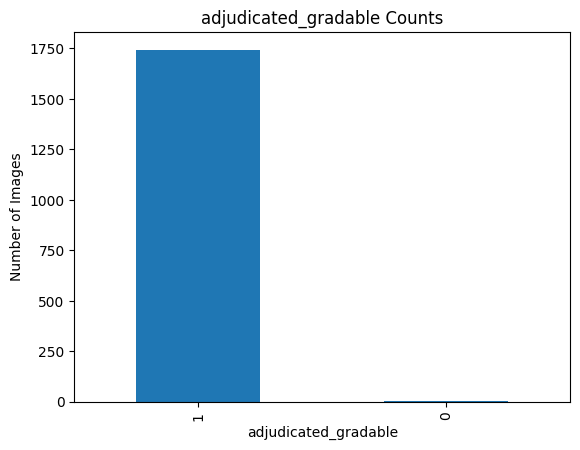

In [ ]:
gradable_counts = df['adjudicated_gradable'].value_counts()
print(gradable_counts)

# Plot a bar chart
gradable_counts.plot(kind='bar', title="adjudicated_gradable Counts")

plt.xlabel('adjudicated_gradable')
plt.ylabel('Number of Images')

plt.show()

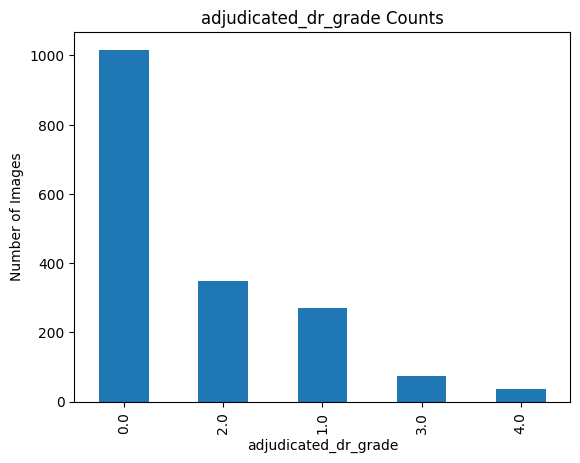

In [ ]:
dr_grade_counts = df['adjudicated_dr_grade'].value_counts()

# Plot a bar chart
dr_grade_counts.plot(kind='bar', title='adjudicated_dr_grade Counts')

plt.xlabel('adjudicated_dr_grade')
plt.ylabel('Number of Images')

plt.show()

0.0    1017
1.0     270
2.0     347
3.0      75
4.0      35
Name: adjudicated_dr_grade, dtype: int64


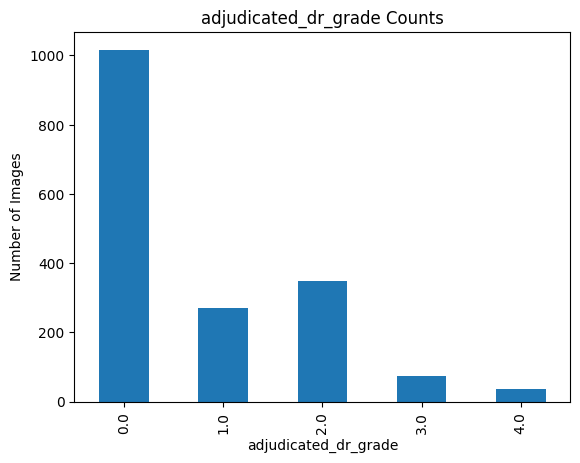

In [ ]:
dr_grade_counts = df['adjudicated_dr_grade'].value_counts().sort_index()
print(dr_grade_counts)
# Plot a bar chart
dr_grade_counts.plot(kind='bar', title='adjudicated_dr_grade Counts')

plt.xlabel('adjudicated_dr_grade')
plt.ylabel('Number of Images')

plt.show()

0.0    1593
1.0     151
Name: adjudicated_dme, dtype: int64


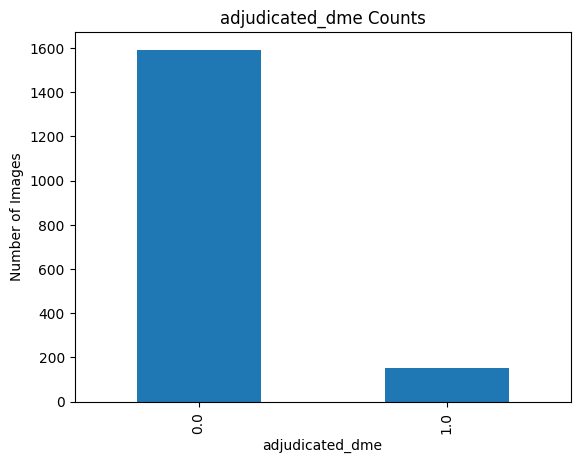

In [ ]:
dme_counts = df['adjudicated_dme'].value_counts().sort_index()
print(dme_counts)
#Plot a bar chart
dme_counts.plot(kind='bar', title='adjudicated_dme Counts')
plt.xlabel('adjudicated_dme')
plt.ylabel('Number of Images')

plt.show()

***Matplotlib Pie Charts***

1    1744
0       4
Name: adjudicated_gradable, dtype: int64


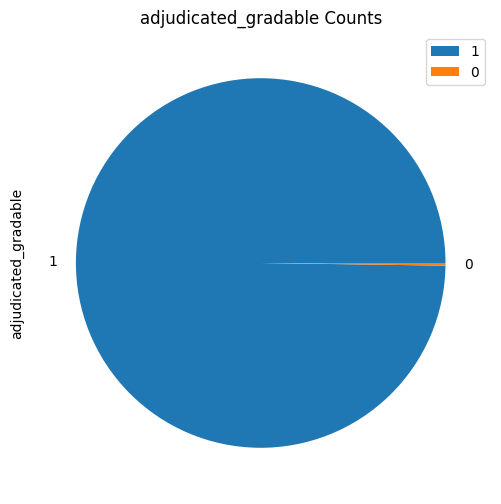

In [ ]:
gradable_counts = df['adjudicated_gradable'].value_counts()
print(gradable_counts)

# Plot a pie chart

gradable_counts.plot(kind='pie', title='adjudicated_gradable Counts', figsize=(6,6))

plt.legend()
plt.show()

0.0    1017
1.0     270
2.0     347
3.0      75
4.0      35
NaN       4
Name: adjudicated_dr_grade, dtype: int64


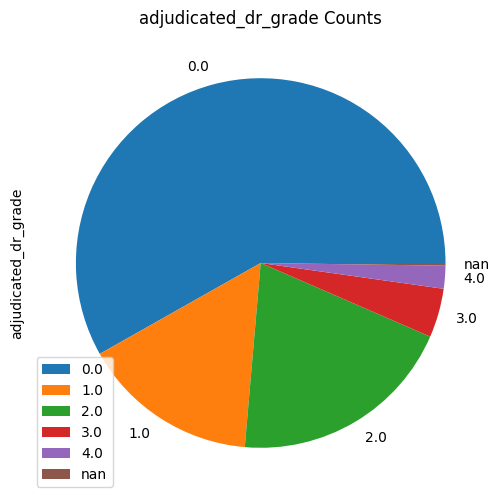

In [ ]:
dr_grade_counts = df['adjudicated_dr_grade'].value_counts(dropna=False).sort_index()
print(dr_grade_counts)
# Plot a pie chart
dr_grade_counts.plot(kind='pie', title='adjudicated_dr_grade Counts',figsize=(6,6))

plt.legend()
plt.show()

0.0    1593
1.0     151
Name: adjudicated_dme, dtype: int64


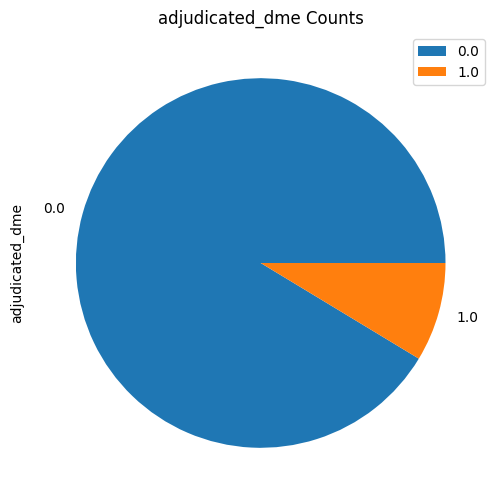

In [ ]:
# Create a data frame of adjudicated_dme counts
adjudicated_dme_counts = df['adjudicated_dme'].value_counts().sort_index()
print(adjudicated_dme_counts)
# Plot a pie chart
adjudicated_dme_counts.plot(kind='pie', title='adjudicated_dme Counts',figsize=(6,6))

plt.legend()
plt.show()

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
# plt.style.use('seaborn-darkgrid')
plt.style.use('dark_background')

0.0    1017
1.0     270
2.0     347
3.0      75
4.0      35
Name: adjudicated_dr_grade, dtype: int64


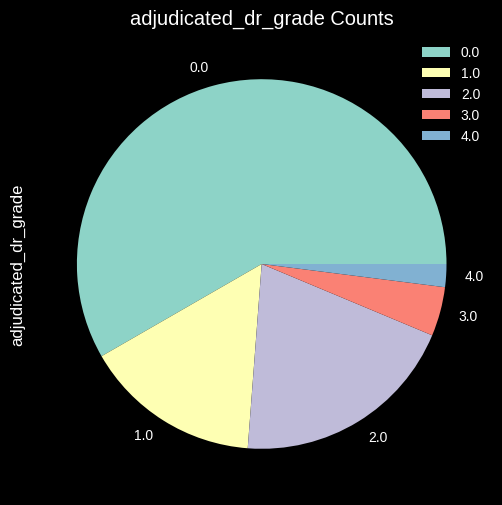

In [ ]:
dr_grade_counts = df['adjudicated_dr_grade'].value_counts().sort_index()
print(dr_grade_counts)
# Plot a pie chart
dr_grade_counts.plot(kind='pie', title='adjudicated_dr_grade Counts',figsize=(6,6))

plt.legend()
plt.show()

1    1744
0       4
Name: adjudicated_gradable, dtype: int64

0.0    1017
1.0     270
2.0     347
3.0      75
4.0      35
Name: adjudicated_dr_grade, dtype: int64

0.0    1593
1.0     151
Name: adjudicated_dme, dtype: int64



<ipython-input-36-38f0c9839295>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 0.98, 'Frequency Counts')

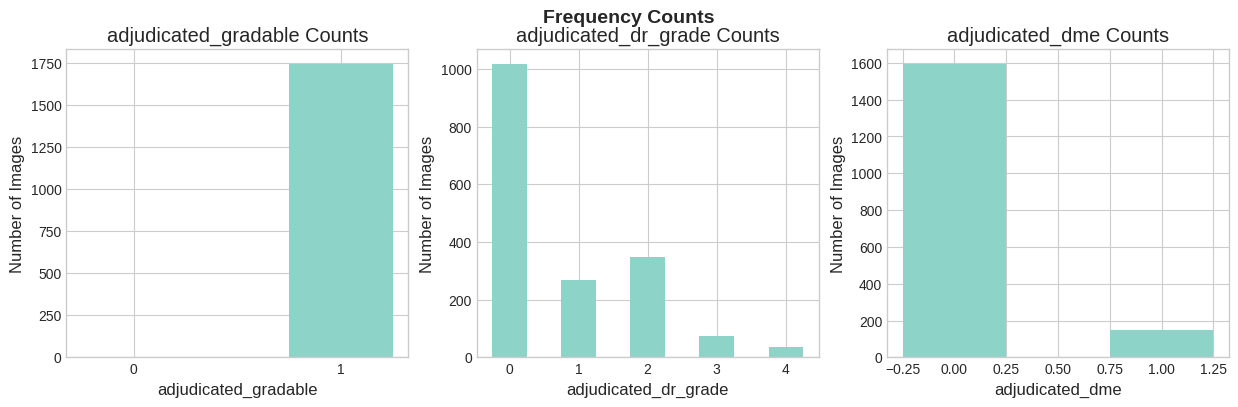

In [ ]:
# Choosing ggplot style
plt.style.use('seaborn-whitegrid')

# Get the figure and the axes (or subplots)
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))


# Prepare data for ax0
print(gradable_counts)
print()
x = gradable_counts.index.values
height = gradable_counts.values

# Axes.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
ax0.bar(x, height, width=0.5, align='center')
ax0.set(title = 'adjudicated_gradable Counts', xlabel='adjudicated_gradable' , ylabel = 'Number of Images')
ax0.set_xticks([0, 1])

# Prepare data for ax1
print(dr_grade_counts)
print()
x = dr_grade_counts.index.values
height = dr_grade_counts.values

# Axes.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
ax1.bar(x, height, width=0.5, align='center')
ax1.set(title = 'adjudicated_dr_grade Counts', xlabel='adjudicated_dr_grade' , ylabel = 'Number of Images')

# Prepare data for ax2
print(dme_counts)
print()
x = dme_counts.index.values
height = dme_counts.values

# Axes.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
ax2.bar(x, height, width=0.5, align='center')
ax2.set(title = 'adjudicated_dme Counts', xlabel='adjudicated_dme' , ylabel = 'Number of Images')
# ax2.set_xticks([0, 1])

# Title the figure
fig.suptitle('Frequency Counts', fontsize=14, fontweight='bold')

<ipython-input-37-7157bd127ad9>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


[1 0]
[1744    4]


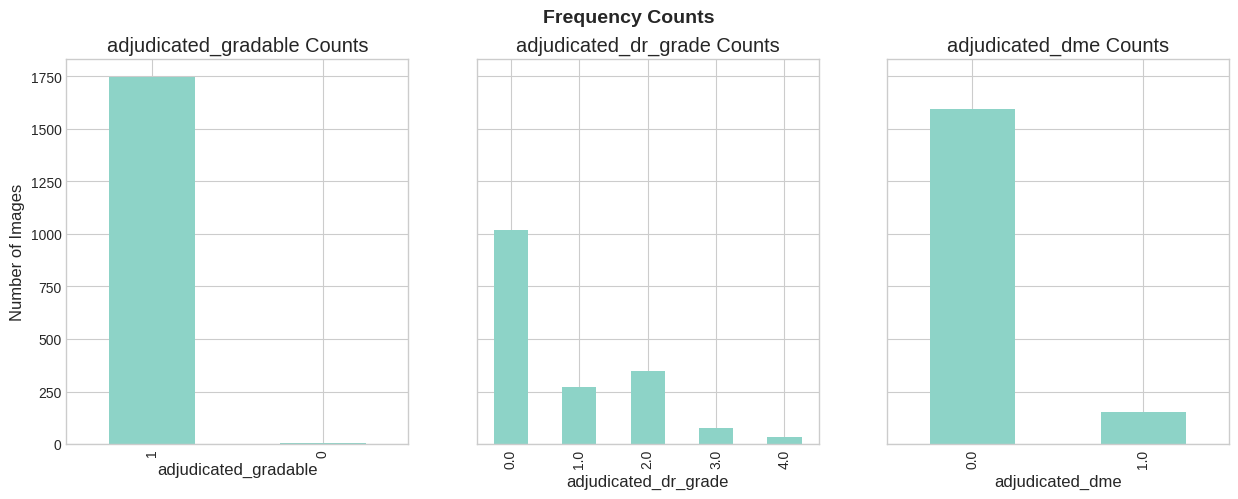

In [ ]:
plt.style.use('seaborn-whitegrid')

print(gradable_counts.index.values)
print(gradable_counts.values)

# Get the figure and the axes (or subplots)
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(15, 5))

gradable_counts.plot(kind='bar', ax= ax0)
ax0.set(title = 'adjudicated_gradable Counts', xlabel='adjudicated_gradable' , ylabel = 'Number of Images')

dr_grade_counts.plot(kind='bar', ax= ax1);
ax1.set(title = 'adjudicated_dr_grade Counts', xlabel='adjudicated_dr_grade' , ylabel = 'Number of Images')

dme_counts.plot(kind='bar', ax= ax2);
ax2.set(title = 'adjudicated_dme Counts', xlabel='adjudicated_dme' , ylabel = 'Number of Images')

# Title the figure
fig.suptitle('Frequency Counts', fontsize=14, fontweight='bold');

In [ ]:
#Create List from numpy array using List comprehension
types = [x   for x in (dr_grade_counts.index.values) ]
values = [x   for x in (dr_grade_counts.values) ]
print(types)
print(values)

[0.0, 1.0, 2.0, 3.0, 4.0]
[1017, 270, 347, 75, 35]


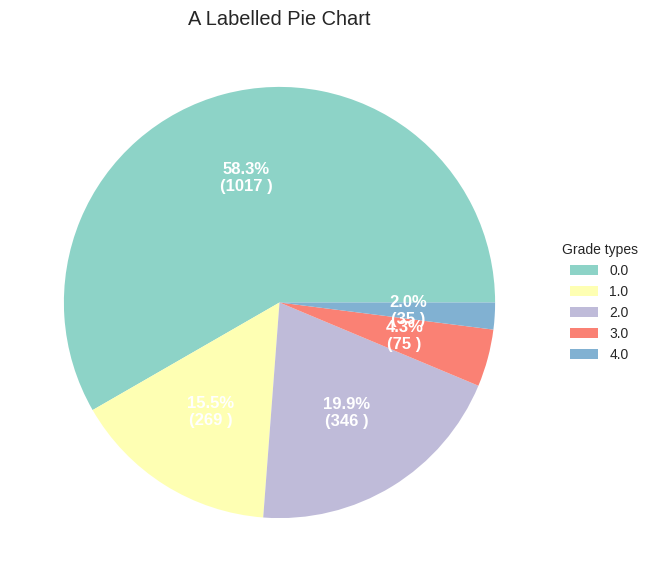

In [ ]:
# Create a Figure and get its axes using subplots
fig, ax = plt.subplots(figsize=(15, 7), subplot_kw=dict(aspect="equal"))


# Prepare data
types = [x   for x in (dr_grade_counts.index.values) ]
values = [x   for x in (dr_grade_counts.values) ]

# Lambda function
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

# ax.pie
wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values),textprops=dict(color="w"))

ax.legend(wedges, types,
          title="Grade types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


ax.set_title("A Labelled Pie Chart")



plt.setp(autotexts, size=12, weight="bold")

plt.show()

In [ ]:
plt.pie(values,labels=types,autopct='%.1f %%')
plt.title('Pie chart')
plt.show()

In [ ]:
grouped_by_drgrade_and_dme = df.groupby(['adjudicated_dr_grade', 'adjudicated_dme'])

grouped_by_drgrade_and_dme.describe()

In [ ]:
key_list_with_nan = grouped_by_drgrade_and_dme.groups.keys()
key_list_with_nan

In [ ]:
df1 = df.loc[df['adjudicated_gradable'].isin([0])]
df1

In [ ]:
key_list = [t for t in key_list_with_nan     if not any(isinstance(n, float) and math.isnan(n)     for n in t)]
#key_list = [t  for t in key_list_with_nan    for n in t   if not math.isnan(n)]
print('\n--- key_list ---\n')
print(key_list)

In [ ]:
grade_types_dict = {0.0: 'None', 1.0: 'Mild DR', 2.0 :'Moderate DR', 3.0:'Severe DR', 4.0:'PDR'}

dme_types_dict = {0.0: 'No Referable DME', 1.0: 'Referable DME'}


#In outer ring, we want to show - dr_grade with 5 different colors for 5 levels - 0.0, 1.0, 2.0, 3.0, 4.0
#In inner ring, we want to show - For each level of dr_grade, dme with 2 different colors or - 0.0 and 1.0
#Nested for loop using List comprehension

[ (i,j)    for i in grade_types_dict.keys()    for j in dme_types_dict.keys()]

In [ ]:

print('\n\n--- grouped.count() ---\n\n')
print(grouped_by_drgrade_and_dme.count())

print('\n\n--- count value for a specific group ---\n\n')
print(grouped_by_drgrade_and_dme.get_group((4.0, 0.0)).count())

print('\n\n--- just the count value alone ---\n\n')
print((grouped_by_drgrade_and_dme.get_group((4.0, 0.0)).count())[0])

In [ ]:
#Creating a 2-dim array to store counts
#One row or each dr_grade levels (5 rows)
#Two columns for each dme (0 and 1)
arr = np.zeros(shape=(5,2))

for i in grade_types_dict.keys():
    for j in dme_types_dict.keys():
        if (i,j) in key_list:
            arr[int(i)][int(j)] = ((grouped_by_drgrade_and_dme.get_group((i, j)).count())[0]);


arr

In [ ]:
#For outer ring we need sum
print(arr.sum(axis=1))

#For inner ring we need individual values
print(arr.flatten())

In [ ]:
fig, ax = plt.subplots()
size = .5
size = 1


cmap_inner = plt.get_cmap('tab10')
cmap_outer = plt.get_cmap('tab20')
inner_colors = cmap_inner(np.arange(5)*1)
outer_colors = cmap_outer(np.arange(10)*1)


ax.pie(arr.sum(axis=1), radius=1.5, colors=inner_colors,
       wedgeprops=dict(width=.5, edgecolor='w', linewidth=2),labels = ('1017',  '270',  '347',   '75',   '35'),labeldistance=0.75)

ax.pie(arr.flatten(), radius=2, colors=outer_colors,
       wedgeprops=dict(width=.5, edgecolor='w' ,linewidth=2),labels = ('1017', '', '262',    '8',  '261 ',   '86',   '33',   '42',   '20',   '15'),labeldistance=0.90)

ax.set(aspect="equal")

#plt.title(label=' Labelled Nested Donut')
plt.legend(('grade_0',  'grade_1',  'grade_2',   'grade_3',   'grade_4'),loc='upper right', bbox_to_anchor=(1.5, 1.5))

plt.show()